### Import Libraries

In [11]:
import pandas as pd                                                 
import matplotlib.pyplot as plt                                      
import seaborn as sns                                            
import numpy as np                                                   
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


### Read the Data

In [2]:
df_train = pd.read_csv("D:\Machine Hacks\Hackathon 7\Train.csv")
df_test = pd.read_csv("D:\Machine Hacks\Hackathon 7\Test.csv")

In [3]:
df_train 

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341


In [4]:
df_test

,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20
...,...,...,...,...
38267,14.60,53.82,1016.28,64.83
38268,29.67,66.51,1015.60,34.10
38269,20.13,47.03,1012.59,83.03
38270,27.14,70.32,1007.08,73.08


In [5]:
df_train["data"] = "train"
df_test["data"] = "test"
df_test["PE"] = np.nan

In [6]:
tot_df = pd.concat([df_train,df_test],axis=0)

In [7]:
tot_df

,AP,AT,PE,RH,V,data
0,1009.24,29.07,449.371855,58.38,72.51,train
1,1006.97,32.38,450.861043,60.04,67.17,train
2,1007.94,19.29,460.894029,63.71,67.71,train
3,1016.64,16.45,467.577314,45.21,41.48,train
4,1013.94,21.43,469.805723,61.25,46.97,train
...,...,...,...,...,...,...
38267,1016.28,14.60,NaN,64.83,53.82,test
38268,1015.60,29.67,NaN,34.10,66.51,test
38269,1012.59,20.13,NaN,83.03,47.03,test
38270,1007.08,27.14,NaN,73.08,70.32,test


## EDA

In [9]:
tot_df.isnull().sum()

AP          0
AT          0
PE      38272
RH          0
V           0
data        0
dtype: int64

In [10]:
tot_df.describe()

,AP,AT,PE,RH,V
count,47840.000000,47840.000000,9568.000000,47840.000000,47840.000000
mean,1013.259078,19.651231,466.473971,73.308978,54.305804
std,5.938535,7.452162,17.040831,14.599658,12.707362
min,992.890000,1.810000,433.506276,25.560000,25.360000
25%,1009.100000,13.510000,451.893897,63.327500,41.740000
50%,1012.940000,20.345000,463.379534,74.975000,52.080000
75%,1017.260000,25.720000,480.565764,84.830000,66.540000
max,1033.300000,37.110000,509.381540,100.160000,81.560000


In [13]:
from scipy.stats import pearsonr

for i in range(df_train.shape[1]-1):
    feature = df_train.columns[i]
    X = df_train[feature].values
    y = df_train['PE']
    r = np.round(pearsonr(X, y),2)
    print(f"Feature PE vs {feature}: r-value : {r}")

Feature PE vs AT: r-value : [-0.95  0.  ]
Feature PE vs V: r-value : [-0.87  0.  ]
Feature PE vs AP: r-value : [0.52 0.  ]
Feature PE vs RH: r-value : [0.39 0.  ]
Feature PE vs PE: r-value : [1. 0.]


In [14]:
## we have a mix of moderate positive and negative correlation as well 

In [15]:
## let's check the correlation via heatmap

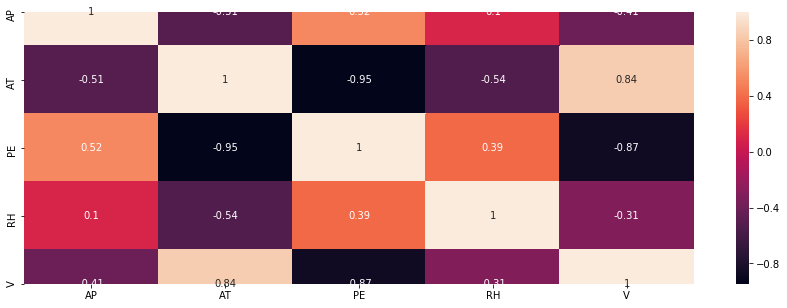

In [16]:
correlation = tot_df.corr()


plt.figure(figsize=(15,5))
sns.heatmap(correlation, annot=True)
plt.show()

In [17]:
## there's no requirement to perform feature selection as the data has less features as well as not highly correlated 

<Figure size 864x432 with 0 Axes>

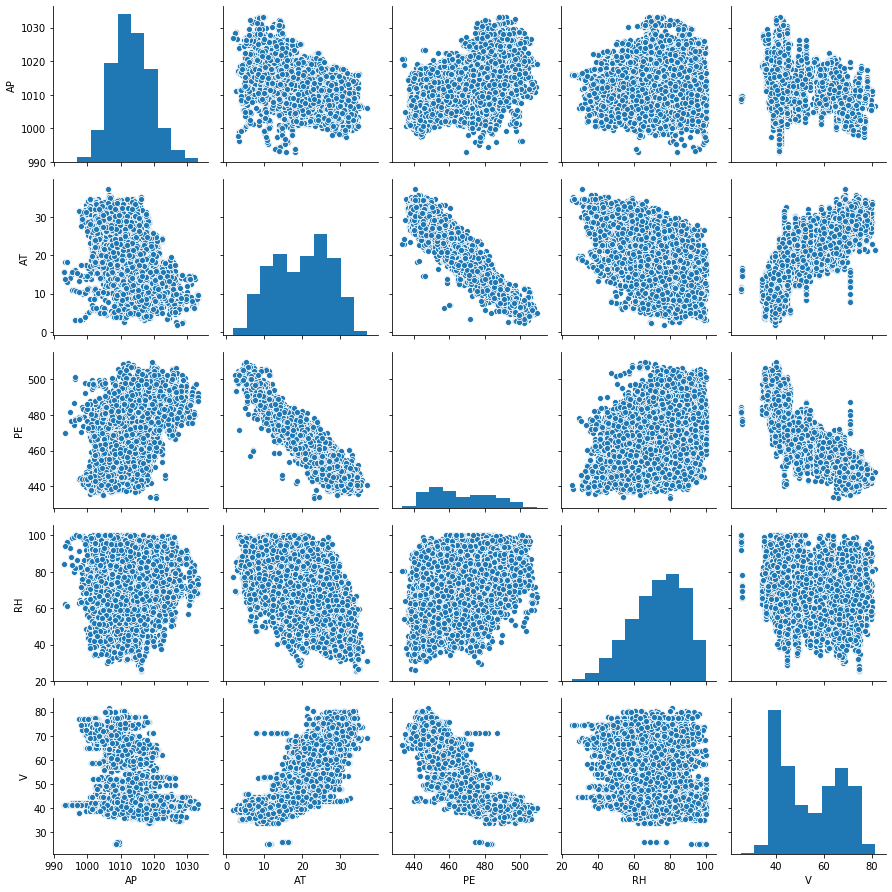

In [18]:
plt.figure(figsize=(12,6))

sns.pairplot(tot_df, diag_kind='hist')

plt.tight_layout()
plt.show()

## Split the data for model building

In [8]:
train_data = tot_df[tot_df['data'] == 'train']
test_data = tot_df[tot_df['data'] == 'test']

In [9]:
test_data

,AP,AT,PE,RH,V,data
0,1013.95,16.98,NaN,82.80,53.16,test
1,1021.01,9.60,NaN,69.03,41.03,test
2,1017.53,6.11,NaN,79.23,38.68,test
3,1009.28,12.34,NaN,78.23,43.22,test
4,1016.51,27.67,NaN,61.20,59.14,test
...,...,...,...,...,...,...
38267,1016.28,14.60,NaN,64.83,53.82,test
38268,1015.60,29.67,NaN,34.10,66.51,test
38269,1012.59,20.13,NaN,83.03,47.03,test
38270,1007.08,27.14,NaN,73.08,70.32,test


In [10]:
train_data

,AP,AT,PE,RH,V,data
0,1009.24,29.07,449.371855,58.38,72.51,train
1,1006.97,32.38,450.861043,60.04,67.17,train
2,1007.94,19.29,460.894029,63.71,67.71,train
3,1016.64,16.45,467.577314,45.21,41.48,train
4,1013.94,21.43,469.805723,61.25,46.97,train
...,...,...,...,...,...,...
9563,1016.14,4.44,499.615488,75.35,38.44,train
9564,1004.50,18.18,461.130122,87.26,67.71,train
9565,1017.97,10.96,481.245635,95.82,45.01,train
9566,1013.34,8.70,490.928341,89.50,36.24,train


### Scale the data 

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
X = train_data.drop(["data" , "PE" ] , 1) 
y = train_data["PE"]

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X

array([[0.40134362, 0.76876618, 0.43745792, 0.83896797],
       [0.34486191, 0.86396319, 0.45980881, 0.74395018],
       [0.36899726, 0.48748921, 0.5092231 , 0.75355872],
       ...,
       [0.61856183, 0.24791487, 0.94156456, 0.34964413],
       [0.50335904, 0.18291631, 0.85646964, 0.19359431],
       [0.22741976, 0.73712971, 0.43072573, 0.59572954]])

In [15]:
y

0       449.371855
1       450.861043
2       460.894029
3       467.577314
4       469.805723
           ...    
9563    499.615488
9564    461.130122
9565    481.245635
9566    490.928341
9567    457.630310
Name: PE, Length: 9568, dtype: float64

## Train and validation split 

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [17]:
test_data = test_data.drop(["data" , "PE"] , 1)

In [18]:
test_data = scaler.transform(test_data)

In [19]:
test_data

array([[0.51853695, 0.42105263, 0.76625825, 0.49466192],
       [0.69420254, 0.20880069, 0.58085364, 0.27882562],
       [0.60761383, 0.1084268 , 0.71819039, 0.23701068],
       ...,
       [0.48469769, 0.51164797, 0.76935506, 0.38558719],
       [0.34759891, 0.71325856, 0.63538441, 0.8       ],
       [0.656631  , 0.47397181, 0.62393968, 0.63896797]])

### Lets build the models

### XGBOOST 

In [22]:
from xgboost import XGBRegressor

model_2 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=15000,
 max_depth=7,
 colsample_bytree=0.8,
 seed=100,
 eval_metric='rmse'
 )

model_2.fit(X_train, y_train, eval_metric='rmse',eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)


[0]	validation_0-rmse:461.46384
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:169.15212
[200]	validation_0-rmse:62.18473
[300]	validation_0-rmse:23.18901
[400]	validation_0-rmse:9.30683
[500]	validation_0-rmse:4.88247
[600]	validation_0-rmse:3.79019
[700]	validation_0-rmse:3.52145
[800]	validation_0-rmse:3.43111
[900]	validation_0-rmse:3.37042
[1000]	validation_0-rmse:3.31867
[1100]	validation_0-rmse:3.26701
[1200]	validation_0-rmse:3.23184
[1300]	validation_0-rmse:3.19500
[1400]	validation_0-rmse:3.16729
[1500]	validation_0-rmse:3.13590
[1600]	validation_0-rmse:3.11543
[1700]	validation_0-rmse:3.08835
[1800]	validation_0-rmse:3.05991
[1900]	validation_0-rmse:3.03632
[2000]	validation_0-rmse:3.01933
[2100]	validation_0-rmse:2.99862
[2200]	validation_0-rmse:2.97980
[2300]	validation_0-rmse:2.96194
[2400]	validation_0-rmse:2.94918
[2500]	validation_0-rmse:2.93644
[2600]	validation_0-rmse:2.92693
[2700]	validation_0-rmse:2.91395
[2800]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=15000, n_jobs=0,
             num_parallel_tree=1, random_state=100, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=100, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
from xgboost import XGBRegressor


xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=10116,
 max_depth=8,
 colsample_bytree=0.9,
 seed=100)
xgb_model=xgb.fit(X,y)

In [24]:
from sklearn.model_selection import cross_val_score


score=cross_val_score(X=X,y=y,estimator=xgb,scoring='neg_root_mean_squared_error',cv=5)

In [25]:
np.mean(score)

-2.5228516002753754

In [27]:
y_pred1 = xgb.predict(test_data)

In [28]:
y_pred1

array([472.28305, 495.0218 , 496.07642, ..., 472.24643, 444.637  ,
       466.06793], dtype=float32)

### LGBM 

In [51]:
from lightgbm import LGBMRegressor

lgb_fit_params={"early_stopping_rounds":50, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }

lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

lgb_params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [52]:
clf_lgb = LGBMRegressor(n_estimators=10000, **lgb_params, random_state=123456789, n_jobs=-1)

clf_lgb.fit(X_train, y_train, **lgb_fit_params)

clf_lgb.best_iteration_

Training until validation scores don't improve for 50 rounds
[100]	valid's rmse: 7.38007
[200]	valid's rmse: 4.55537
[300]	valid's rmse: 3.9087
[400]	valid's rmse: 3.71967
[500]	valid's rmse: 3.623
[600]	valid's rmse: 3.55031
[700]	valid's rmse: 3.4938
[800]	valid's rmse: 3.44432
[900]	valid's rmse: 3.39583
[1000]	valid's rmse: 3.35529
[1100]	valid's rmse: 3.3203
[1200]	valid's rmse: 3.2849
[1300]	valid's rmse: 3.25186
[1400]	valid's rmse: 3.22239
[1500]	valid's rmse: 3.19375
[1600]	valid's rmse: 3.16839
[1700]	valid's rmse: 3.1457
[1800]	valid's rmse: 3.12318
[1900]	valid's rmse: 3.10226
[2000]	valid's rmse: 3.08342
[2100]	valid's rmse: 3.06642
[2200]	valid's rmse: 3.04787
[2300]	valid's rmse: 3.03157
[2400]	valid's rmse: 3.01855
[2500]	valid's rmse: 3.00495
[2600]	valid's rmse: 2.99176
[2700]	valid's rmse: 2.97895
[2800]	valid's rmse: 2.96731
[2900]	valid's rmse: 2.95511
[3000]	valid's rmse: 2.9434
[3100]	valid's rmse: 2.93326
[3200]	valid's rmse: 2.9239
[3300]	valid's rmse: 2.91537


8882

In [53]:
clf_lgb=LGBMRegressor(n_estimators=int(clf_lgb.best_iteration_*1.5), **lgb_params)

lgb_model=clf_lgb.fit(X, y)

In [54]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(X=X,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [55]:
np.mean(score)

-2.550047493173006

In [57]:
y_pred2 = lgb_model.predict(test_data)

In [58]:
y_pred2

array([471.15981356, 495.14174995, 495.92057485, ..., 471.84687505,
       445.25529576, 463.762465  ])

### Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
gbc=GradientBoostingRegressor(learning_rate=0.01,max_depth=7, n_estimators=4700, subsample=0.7)

In [48]:
gbc.fit(X , y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=4700,
                          subsample=0.7)

In [49]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=gbc,scoring='neg_root_mean_squared_error',cv=5)

In [50]:
np.mean(score)  ##2.5516 ###2.5482

-2.548211725142763

In [51]:
y_pred3 = gbc.predict(test_data)

In [52]:
y_pred3

array([471.82326545, 494.5753182 , 496.58332735, ..., 471.35696442,
       445.27762669, 465.63310342])

In [ ]:
## Gradient boosting not included in the final part

### Trial run LGBM 1

In [101]:
from lightgbm import LGBMRegressor

lgb_fit_params={"early_stopping_rounds":50, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }

lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}


lgb_params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [102]:
clf_lgb = LGBMRegressor(n_estimators=10000, **lgb_params, random_state=123456789, n_jobs=-1)

clf_lgb.fit(X_train, y_train, **lgb_fit_params)

clf_lgb.best_iteration_

Training until validation scores don't improve for 50 rounds
[100]	valid's rmse: 7.38007
[200]	valid's rmse: 4.55537
[300]	valid's rmse: 3.9087
[400]	valid's rmse: 3.71967
[500]	valid's rmse: 3.623
[600]	valid's rmse: 3.55031
[700]	valid's rmse: 3.4938
[800]	valid's rmse: 3.44432
[900]	valid's rmse: 3.39583
[1000]	valid's rmse: 3.35529
[1100]	valid's rmse: 3.3203
[1200]	valid's rmse: 3.2849
[1300]	valid's rmse: 3.25186
[1400]	valid's rmse: 3.22239
[1500]	valid's rmse: 3.19375
[1600]	valid's rmse: 3.16839
[1700]	valid's rmse: 3.1457
[1800]	valid's rmse: 3.12318
[1900]	valid's rmse: 3.10226
[2000]	valid's rmse: 3.08342
[2100]	valid's rmse: 3.06642
[2200]	valid's rmse: 3.04787
[2300]	valid's rmse: 3.03157
[2400]	valid's rmse: 3.01855
[2500]	valid's rmse: 3.00495
[2600]	valid's rmse: 2.99176
[2700]	valid's rmse: 2.97895
[2800]	valid's rmse: 2.96731
[2900]	valid's rmse: 2.95511
[3000]	valid's rmse: 2.9434
[3100]	valid's rmse: 2.93326
[3200]	valid's rmse: 2.9239
[3300]	valid's rmse: 2.91537


8882

In [103]:
clf_lgb=LGBMRegressor(n_estimators=int(clf_lgb.best_iteration_*2.2), **lgb_params)

lgb_model=clf_lgb.fit(X, y)

In [105]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(X=X,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [106]:
np.mean(score)

-2.5449480490412952

### Trial run XGBOOST - final

In [261]:
from xgboost import XGBRegressor

model_2 = XGBRegressor(
 learning_rate =0.05,
 n_estimators=25000,
 max_depth=9,
 colsample_bytree=0.95,
 seed=100,
 eval_metric='rmse'
 )

model_2.fit(X_train, y_train, eval_metric='rmse',eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)


[0]	validation_0-rmse:442.83402
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:4.48880
[200]	validation_0-rmse:3.05601
[300]	validation_0-rmse:2.90780
[400]	validation_0-rmse:2.82893
[500]	validation_0-rmse:2.76831
[600]	validation_0-rmse:2.73290
[700]	validation_0-rmse:2.70985
[800]	validation_0-rmse:2.69232
[900]	validation_0-rmse:2.68157
[1000]	validation_0-rmse:2.67514
[1100]	validation_0-rmse:2.66996
[1200]	validation_0-rmse:2.66890
[1300]	validation_0-rmse:2.66780
Stopping. Best iteration:
[1256]	validation_0-rmse:2.66744



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=25000, n_jobs=0,
             num_parallel_tree=1, random_state=100, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=100, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [262]:
from xgboost import XGBRegressor

xgb=XGBRegressor(
 learning_rate =0.05,
 n_estimators=1256,
 max_depth=9,
 colsample_bytree=0.95,
 seed=100)

xgb_model=xgb.fit(X,y)

In [263]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(X=X,y=y,estimator=xgb,scoring='neg_root_mean_squared_error',cv=5)

In [264]:
np.mean(score)

-2.5203312963880524

In [265]:
y_pred1_final = xgb.predict(test_data) ##predicting the test data 

In [266]:
y_pred1_final

array([471.83777, 495.02655, 496.9469 , ..., 472.09995, 443.97733,
       466.2765 ], dtype=float32)

### Trial run LGBM 2

In [197]:
from lightgbm import LGBMRegressor

lgb_fit_params={"early_stopping_rounds":50, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }

lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.85,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.05,
 'max_bin': 355,
 'max_depth': 8,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}


lgb_params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.85,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.05,
 'max_bin': 355,
 'max_depth': 8,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [198]:
clf_lgb = LGBMRegressor(n_estimators=10000, **lgb_params, random_state=123456789, n_jobs=-1)

clf_lgb.fit(X_train, y_train, **lgb_fit_params)

clf_lgb.best_iteration_

Training until validation scores don't improve for 50 rounds
[100]	valid's rmse: 3.5616
[200]	valid's rmse: 3.2858
[300]	valid's rmse: 3.13184
[400]	valid's rmse: 3.00472
[500]	valid's rmse: 2.92191
[600]	valid's rmse: 2.87065
[700]	valid's rmse: 2.82643
[800]	valid's rmse: 2.79416
[900]	valid's rmse: 2.77118
[1000]	valid's rmse: 2.74728
[1100]	valid's rmse: 2.73123
[1200]	valid's rmse: 2.71725
[1300]	valid's rmse: 2.70522
[1400]	valid's rmse: 2.69686
[1500]	valid's rmse: 2.69007
[1600]	valid's rmse: 2.68756
[1700]	valid's rmse: 2.68359
[1800]	valid's rmse: 2.67774
[1900]	valid's rmse: 2.67677
Early stopping, best iteration is:
[1880]	valid's rmse: 2.67644


1880

In [199]:
clf_lgb=LGBMRegressor(n_estimators=int(clf_lgb.best_iteration_*1.5), **lgb_params)

lgb_model=clf_lgb.fit(X, y)

In [200]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(X=X,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [201]:
np.mean(score)

-2.5093001378308806

In [202]:
y_pred2_trial1 = lgb_model.predict(test_data)

In [203]:
y_pred2_trial1

array([471.52102935, 494.55843193, 496.79590267, ..., 472.08922961,
       445.01834513, 463.62887696])

### Trail run LGBM - final

In [566]:
from lightgbm import LGBMRegressor

lgb_fit_params={"early_stopping_rounds":50, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }

lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.05,
 'max_bin': 569,
 'max_depth': 7,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 45}

lgb_params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.05,
 'max_bin': 569,
 'max_depth': 7,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 45}

In [567]:
clf_lgb = LGBMRegressor(n_estimators=10000, **lgb_params, random_state=123456789, n_jobs=-1)

clf_lgb.fit(X_train, y_train, **lgb_fit_params)

clf_lgb.best_iteration_

Training until validation scores don't improve for 50 rounds
[100]	valid's rmse: 3.42424
[200]	valid's rmse: 3.14082
[300]	valid's rmse: 2.98127
[400]	valid's rmse: 2.88286
[500]	valid's rmse: 2.81997
[600]	valid's rmse: 2.77537
[700]	valid's rmse: 2.74345
[800]	valid's rmse: 2.72392
[900]	valid's rmse: 2.7131
[1000]	valid's rmse: 2.70154
[1100]	valid's rmse: 2.69317
[1200]	valid's rmse: 2.68758
[1300]	valid's rmse: 2.68409
Early stopping, best iteration is:
[1274]	valid's rmse: 2.68382


1274

In [554]:
clf_lgb=LGBMRegressor(n_estimators=int(clf_lgb.best_iteration_*1.8), **lgb_params)

lgb_model=clf_lgb.fit(X, y)

In [555]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(X=X,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [556]:
np.mean(score)

-2.5073461073442807

In [ ]:
##predicting the test data

In [450]:
y_pred2_trial2 = lgb_model.predict(test_data)

In [451]:
y_pred2_trial2

array([471.84251989, 494.83801428, 496.85681761, ..., 472.02729629,
       444.88153467, 459.83078167])

In [568]:
y_predfinal = (0.2 * y_pred1_final) + (0.8 * y_pred2_trial2) # (0.1 * y_pred3)
y_predfinal

array([471.84156962, 494.87572148, 496.8748355 , ..., 472.04182757,
       444.7006913 , 461.11992776])

In [569]:
submission=pd.DataFrame(y_predfinal , columns = ["PE"])
submission

,PE
0,471.841570
1,494.875721
2,496.874835
3,480.255216
4,445.530417
...,...
38267,475.707131
38268,447.178919
38269,472.041828
38270,444.700691


In [570]:
submission.to_excel('sub7_final29.xlsx',index=False) 